### Import Data

In [2]:
import boto3
import sagemaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

s3_transactions_combined_path = "s3://ads508an/transactions_combined.csv"

In [3]:
s3_client = boto3.client("s3")

BUCKET='ads508an'
KEY='transactions_combined.csv'

response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
df_transactions_combined = pd.read_csv(response.get("Body"))

In [4]:
df_transactions_combined.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0.005068,1,741220,Maria Shorts.,274,Shorts,Garment Lower body,...,Divided Basics,1002,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,NaN,NaN,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0.015237,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0.050831,1,812683,Notting Hill,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,"Long dress in an airy weave with a round, gath...",NaN,NaN,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0.025407,1,748269,Laura short sleeve polo,254,Top,Garment Upper body,...,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with...",NaN,NaN,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0.033881,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...


### Type Transformation

In [5]:
df_transactions_combined['article_id'] = df_transactions_combined['article_id'].astype('str').dtypes
df_transactions_combined['product_code'] = df_transactions_combined['product_code'].astype('str').dtypes
df_transactions_combined['product_type_no'] = df_transactions_combined['product_type_no'].astype('str').dtypes
df_transactions_combined['colour_group_code'] = df_transactions_combined['colour_group_code'].astype('str').dtypes
df_transactions_combined['graphical_appearance_no'] = df_transactions_combined['graphical_appearance_no'].astype('str').dtypes
df_transactions_combined['perceived_colour_value_id'] = df_transactions_combined['perceived_colour_value_id'].astype('str').dtypes
df_transactions_combined['perceived_colour_master_id'] = df_transactions_combined['perceived_colour_master_id'].astype('str').dtypes
df_transactions_combined['department_no'] = df_transactions_combined['department_no'].astype('str').dtypes
df_transactions_combined['index_code'] = df_transactions_combined['index_code'].astype('str').dtypes
df_transactions_combined['index_group_no'] = df_transactions_combined['index_group_no'].astype('str').dtypes
df_transactions_combined['section_no'] = df_transactions_combined['section_no'].astype('str').dtypes
df_transactions_combined['garment_group_no'] = df_transactions_combined['garment_group_no'].astype('str').dtypes
df_transactions_combined['FN'] = df_transactions_combined['FN'].astype('category').dtypes
df_transactions_combined['Active'] = df_transactions_combined['Active'].astype('category').dtypes
df_transactions_combined['club_member_status'] = df_transactions_combined['club_member_status'].astype('category').dtypes
df_transactions_combined['fashion_news_frequency'] = df_transactions_combined['fashion_news_frequency'].astype('category').dtypes

### Data Preperation

In [6]:
#Copy the dataframe so if you make any mistakes we can easily revert the changes
df_transact = df_transactions_combined

##### Change format of the price variable

In [7]:
df_transact['price'] = round(df_transact['price']*100,2)

#### Remove Null Values

In [8]:
df_transact = df_transact.dropna(subset=['age', 'detail_desc'])

In [9]:
df_transact.isnull().sum()

t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
FN            

##### Impute Null Values

In [10]:
df_transact['FN'] = df_transact['FN'].fillna(0)
df_transact['Active'] = df_transact['Active'].fillna(0)
df_transact['club_member_status'] = df_transact['club_member_status'].fillna(0)
df_transact['fashion_news_frequency'] = df_transact['fashion_news_frequency'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
df_transact.isnull().sum()

t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
FN            

In [12]:
df_selected=df_transact[['product_type_name','club_member_status','department_name','section_name','Active','garment_group_name','sales_channel_id','price','age']]

In [13]:
df_selected.head()

,product_type_name,club_member_status,department_name,section_name,Active,garment_group_name,sales_channel_id,price,age
0,Shorts,category,Basic 1,Divided Basics,category,Jersey Basic,1,0.51,20.0
1,Bra,category,Expressive Lingerie,Womens Lingerie,category,"Under-, Nightwear",2,1.52,18.0
2,Dress,category,Dress,Womens Everyday Collection,category,Dresses Ladies,1,5.08,32.0
3,Top,category,Knitwear,Womens Tailoring,category,Knitwear,1,2.54,44.0
4,Dress,category,Woven top,H&M+,category,Blouses,2,3.39,48.0


In [14]:
count_class_2, count_class_1= df_selected.sales_channel_id.value_counts()

# Divide by class
df_class_1 = df_selected[df_selected['sales_channel_id'] == 1]
df_class_2 = df_selected[df_selected['sales_channel_id'] == 2]

In [15]:
df_class_1.head()

,product_type_name,club_member_status,department_name,section_name,Active,garment_group_name,sales_channel_id,price,age
0,Shorts,category,Basic 1,Divided Basics,category,Jersey Basic,1,0.51,20.0
2,Dress,category,Dress,Womens Everyday Collection,category,Dresses Ladies,1,5.08,32.0
3,Top,category,Knitwear,Womens Tailoring,category,Knitwear,1,2.54,44.0
11,Bra,category,Expressive Lingerie,Womens Lingerie,category,"Under-, Nightwear",1,2.54,49.0
13,Hair ties,category,Hair Accessories,Womens Small accessories,category,Accessories,1,0.68,20.0


In [16]:
#print(count_class_1)
print(count_class_2)

139924


In [17]:
df_class_2_under = df_class_2.sample(count_class_1)
df_test_under = pd.concat([df_class_2_under, df_class_1], axis=0)

In [18]:
df_test_under.head()

,product_type_name,club_member_status,department_name,section_name,Active,garment_group_name,sales_channel_id,price,age
188125,Dress,category,Dresses,Divided Collection,category,Dresses Ladies,2,4.41,43.0
30402,Top,category,Jersey fancy,Womens Everyday Collection,category,Jersey Fancy,2,0.76,25.0
72976,Trousers,category,Trousers,Divided Collection,category,Trousers,2,3.39,54.0
62241,Sweater,category,Jersey Fancy DS,Divided Selected,category,Jersey Fancy,2,4.57,23.0
33097,Vest top,category,Jersey,Mama,category,Jersey Fancy,2,2.48,34.0


In [19]:
df_test_under.sales_channel_id.value_counts()

2    58510
1    58510
Name: sales_channel_id, dtype: int64

Hot Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")# dropping first to avoid dummy variable trap

In [22]:
categorical_vars =['product_type_name','club_member_status','department_name','section_name','Active','garment_group_name','sales_channel_id']

In [23]:
OHE = one_hot_encoder.fit(df_test_under[categorical_vars])

In [24]:
#The new dataframe is : df_test_under Use this !
encoder_vars_array = OHE.transform(df_test_under[categorical_vars])

In [25]:
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

In [26]:
df_categorical=pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)

In [27]:
df_categorical.head()

,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blazer,product_type_name_Blouse,product_type_name_Bodysuit,...,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby,sales_channel_id_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
numeric_vars=['price','age']
df_numeric=df_test_under[numeric_vars]

In [29]:
# concatenate the new dataframe back to the original input variables dataframe
df_final = pd.concat([df_numeric.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis = 1)

### Split Test and Training Dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#80/20 rule spliting 
training_data, testing_data = train_test_split(df_final, test_size=0.25, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 87765
No. of testing examples: 29255


In [32]:
training_data.head()

,price,age,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blazer,...,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby,sales_channel_id_2
76533,2.54,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116503,1.35,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
109873,3.39,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116165,5.08,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37510,2.03,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
output_location = "s3://ads508an"
data_location = "s3://ads508an/transactions_combined.csv"

In [34]:
#K-Means Model
from sagemaker import KMeans

data_location = 's3://{}/kmeans_highlevel_example/data'.format(bucket)
output_location = 's3://{}/kmeans_example/output'.format(bucket)

print('training data will be uploaded to: {}'.format(data_location))
print('training artifacts will be uploaded to: {}'.format(output_location))

kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.m4.xlarge',
                output_path=output_location,
                k=3,#use elbow curve instead if you want
                data_location=data_location)

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


training data will be uploaded to: s3://sagemaker-us-east-1-996685578635/kmeans_highlevel_example/data
training artifacts will be uploaded to: s3://sagemaker-us-east-1-996685578635/kmeans_example/output


In [35]:
#Changed into float format
train_data=training_data.values.astype('float32')

In [36]:
#Model building stage with train data
kmeans.fit(kmeans.record_set(train_data))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-04-04 22:58:13 Starting - Starting the training job...ProfilerReport-1649113092: InProgress
...
2022-04-04 22:58:57 Starting - Preparing the instances for training.........
2022-04-04 23:00:37 Downloading - Downloading input data...
2022-04-04 23:01:00 Training - Downloading the training image.....Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/04/2022 23:02:00 INFO 139973363595072] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'init_method': 'random', 'mini_batch_size': '5000', 'epochs': '1', 'extra_center_factor': 'auto', 'local_lloyd_max_iter': '300', 'local_lloyd_tol': '0.0001', 'local_lloyd_init_method': 'kmeans++', 'local_lloyd_num_trials': 'auto', 'half_life_time_size': '0', 'eval_metrics': '["msd"]', 'force_dense': 'true', '_disable_wait_to_read': 'false', '_enable_profiler': 'false', '_kvstore': 'auto', '_log_level': 'info', '_num_gpus': 'auto', '_nu

# Training

## Deployment

In [37]:
# t2.medium is the lowest possible instance for deployment.
predictor=kmeans.deploy(initial_instance_count=1,instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------!

In [38]:
#We have chosen a fraction of the testing data since our deployed instance was not heavy enough to handle all data. 
testing_sample=testing_data.sample(frac=0.01)

In [39]:
#Converting sample into float
test_sample=testing_sample.values.astype('float32')

In [40]:
#Making prediction on the test data
results=predictor.predict(test_sample)

In [41]:
#unpacking the json payload
cluster_labels = [r.label["closest_cluster"].float32_tensor.values[0] for r in results]

In [42]:
#Value count of the Kmeans clusters data points
pd.DataFrame(cluster_labels)[0].value_counts()

0.0    164
1.0     88
2.0     41
Name: 0, dtype: int64

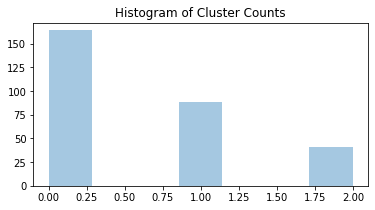

In [43]:
#Visualzation of Clusters
ax = plt.subplots(figsize=(6, 3))
ax = sns.distplot(cluster_labels, kde=False)
title = "Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [44]:
#because there are many dimenions 400 it is impossible to visualize in pair plot unless we bring
#down the number of dimenions to at least 3 by using PCA method. One more option is to visualise 2 dimesions at a time. For example, visalise price against age.

# Model evaluation

In [45]:
from sklearn.metrics import silhouette_score
score = silhouette_score(test_sample, cluster_labels, metric='euclidean')

In [46]:
#Score ranges between 0 to 1. where 1 is perfect and 0 is worst.
score

0.5371883

# Generating never before seen data

In [47]:
df_dummy=df_transact.iloc[0:1]
df_dummy.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,object,0.51,1,object,Maria Shorts.,object,Shorts,Garment Lower body,...,Divided Basics,object,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,category,category,category,category,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...


In [48]:
df_dummy['price']=0.63
df_dummy['garment_group_name']='Outdoor'
df_dummy['product_type_name']='Top'
df_dummy['age']=25.0
df_dummy.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,object,0.63,1,object,Maria Shorts.,object,Top,Garment Lower body,...,Divided Basics,object,Outdoor,Short shorts in lightweight sweatshirt fabric ...,category,category,category,category,25.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...


In [49]:
categorical_vars =['product_type_name','club_member_status','department_name','section_name','Active','garment_group_name','sales_channel_id']

In [50]:
#The new dataframe is : df_test_under Use this !
encoder_vars_array = OHE.transform(df_dummy[categorical_vars])

In [51]:
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

In [52]:
df_categorical=pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)

In [53]:
numeric_vars=['price','age']
df_numeric=df_dummy[numeric_vars]

In [54]:
df_dummyfinal = pd.concat([df_numeric.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis = 1)

In [55]:
#Converting sample into float
test_sample=df_dummyfinal.values.astype('float32')

In [56]:
#Making prediction on the test data
results=predictor.predict(test_sample)

In [57]:
#unpacking the json payload
cluster_labels = [r.label["closest_cluster"].float32_tensor.values[0] for r in results]

In [58]:
#Value count of the Kmeans clusters data points
pd.DataFrame(cluster_labels)[0].value_counts()

0.0    1
Name: 0, dtype: int64

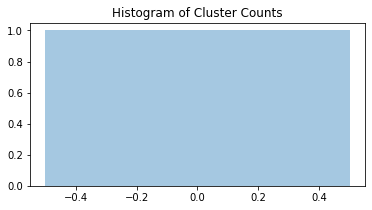

In [59]:
#Visualzation of Clusters
ax = plt.subplots(figsize=(6, 3))
ax = sns.distplot(cluster_labels, kde=False)
title = "Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()